
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2016 epoch. If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- I. Heisz

## Variables you Can Modify

In [46]:
startYear = 1995
endYear   = 2017  # The end year is not included so write the last year you want + 1

committee = 9998 # enter the number (no strings) of the committee you want to explore, ex. 1508
# If you are unsure of what committees you can select see the "available committees" section in the code below

## Import the Data

In [37]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

## Reads and processes the raw csv datafiles from NSERC, stored in Amazon s3.
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [9, 11, 17], encoding='latin-1'))
    
    # Prints the year name of each file that is processed.
    print(year)
    
## Rename columns for better readability.
df.columns = ['FiscalYear', 'AwardAmount', 'Committee']  

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


## Available Committees

In [33]:
availableCommittees = df.drop_duplicates(subset = 'Committee')
sortedCommittees = availableCommittees.sort_values(by=['Committee'], ascending=[True])
print(sortedCommittees.to_string(columns= ['Committee'], index=False))

Committee
        2
        3
        4
        6
        7
        8
        9
       11
       12
       13
       14
       16
       17
       18
       19
       20
       21
       24
       26
       28
       29
       30
       31
       32
       33
       34
       40
       43
       63
       66
       81
       82
       83
       84
       85
       86
       87
       90
       92
       93
       95
       96
       99
      101
      103
      104
      105
      106
      127
      131
      135
      141
      142
      143
      146
      147
      148
      149
      150
      155
      158
      159
      160
      166
      168
      169
      170
      171
      172
      173
      175
      176
      177
      178
      179
      180
      181
      183
      184
      185
      186
      187
      188
      193
      194
      195
      196
      197
      198
      199
      200
      201
      205
      210
      215
      220
      225
      230
      235


### Data for the Selected Committee
re-run this cell and all cells below this if you select a new committee

In [48]:
## Get the data for the chosen committee
mathFundingData = df.loc[(df['Committee'] == committee)]

# A sample of the data imported
mathFundingData.head()

,FiscalYear,AwardAmount,Committee
233,2000,50000,9998
509,2000,25000,9998
979,2000,100000,9998
1114,2000,100000,9998
1129,2000,50000,9998


## Total Awards Granted Per Year 
Note: Committee 1508 for Mathematics and Statistics was created in 2009 so there is no pre-2009 data on it.

In [50]:
# The sum of all awards for each individual year
awardSums = mathFundingData.groupby(['FiscalYear'])['AwardAmount'].transform('sum')

# Make a new column called 'TotalAward' to show the awardSums
awardTotalsByYear = mathFundingData.assign(TotalAward = awardSums)

# Count the number of awards given in each year
awardsGiven = awardTotalsByYear.groupby('FiscalYear').cumcount() + 1

# Make a new column called 'AwardCount' to show the awardsGiven  
awardTotalsByYear = awardTotalsByYear.assign(AwardCount=awardsGiven)

# Drop all but the last of duplicate years, now that we have the award amount info from them. 
# We keep the last one because that is where the final value of cumCount for the number of awards given is.
deduplicatedData = awardTotalsByYear.drop_duplicates(subset = 'FiscalYear', keep = 'last')

deduplicatedData[['FiscalYear','TotalAward', 'AwardCount']]

,FiscalYear,TotalAward,AwardCount
17344,2000,5025000,65
16996,2001,27050000,230
18074,2002,47550000,359
20954,2003,67884136,504
21170,2004,86427462,624
22353,2005,100246855,734
22876,2006,111178757,841
23778,2007,115887247,925
25589,2008,118014545,960
24568,2009,117630000,944


## Plots of the Data

In [41]:
## Imports necessary for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Plotly for interactive plotting
!pip3 install plotly --user; 
import plotly.plotly as py
import plotly.graph_objs as go

### Plot of the Award Distribution for All Years

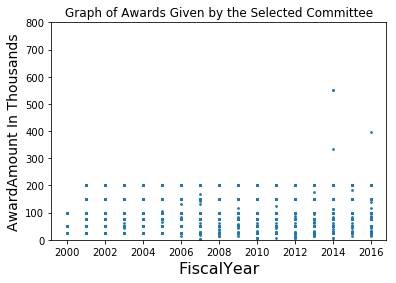

In [54]:
## Plot Settings, modifiable variables
data = mathFundingData

xAxis = 'FiscalYear'
yAxis = 'AwardAmount'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,800]
yScalingFactor = 10**3
yScalingFactorString = ' In Thousands'

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
plt.xlabel(xAxis, fontsize=16)

y = data[yAxis]
plt.ylabel(yAxis+yScalingFactorString, fontsize=14)
axes.set_ylim(yAxisRange)
y = y/yScalingFactor

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()

### Plot of the Award Distribution for a Selected Year

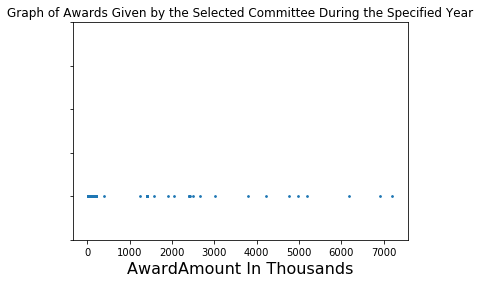

In [60]:
## Plot Settings, modifiable variables
year = 2016
data = mathFundingData.loc[(mathFundingData['FiscalYear'] == year)]

yAxis = 'FiscalYear'
xAxis = 'AwardAmount'

xScalingFactor = 10**3
xScalingFactorString = ' In Thousands'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,10000]

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee During the Specified Year'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
x = x/xScalingFactor
plt.xlabel(xAxis+xScalingFactorString, fontsize=16)

y = data[yAxis]
axes.set_ylim(yAxisRange)
axes.set_yticklabels([]) # make it so the y axis is not numbered

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()